In [ ]:
# DataScience Capstone Project:
# The Battle of the Neighborhoods
# An analysis of various neighborhoods in different cities

# This Notebook consists of two parts. 
# The first part defines the problem statement, and the potential solution for that problem statement. 
# The second part of the notebook describes the actual solution for the problem statement.


# Problem statement
# My friend Mike wants to open a new cafe in Singapore. He hasn't decided yet on the location has asked me to provide a suggestion what the best location is.

# We are looking for a location which is 
#  1. near to popular tourist spots, offices and public transports 
#  2. no high-rated competitors nearby


# Data selection and requirements
# I will obtain data from Foursquare. 
# To do the analysis I will use Jupyter notebooks and python 3.7. Libraries 
# I'm going to use include map-visualization, analytical libraries and libraries that make it convenient to work with datasets.

# To answer the question for the customer, I want to create lists of different types of venues. 
# Once I have categorized and clustered them, I want to plot them on a map. 
# Based on this, I want to be able to show the best area for the coffee-shop to be opened.

In [1]:
!conda update -n base -c defaults conda --yes

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::dask-core==0.19.1=py37_0
  - defaults/linux-64::lazy-object-proxy==1.3.1=py37h14c3975_2
  - defaults/linux-64::beautifulsoup4==4.6.3=py37_0
  - defaults/linux-64::gevent==1.3.6=py37h7b6447c_0
  - defaults/linux-64::decorator==4.3.0=py37_0
  - defaults/linux-64::clyent==1.2.2=py37_1
  - defaults/linux-64::mkl_fft==1.0.4=py37h4414c95_1
  - defaults/linux-64::numpy-base==1.15.1=py37h81de0dd_0
  - defaults/linux-64::jdcal==1.4=py37_0
  - defaults/linux-64::glob2==0.6=py37_0
  - defaults/linux-64::cairo==1.14.12=h8948797_3
  - defaults/linux-64::sortedcollections==1.0.1=py37_0
  - defaults/linux-64::ipywidgets==7.4.1=py37_0
  - defaults/linux-64::wrapt==1.10.11=py37h14c3975_2
  - defaults/linux-64::pyflakes==2.0.0=py37_0
  - defaults/linux-64::pep8==1.7.1=py37_0
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/l

In [2]:
!conda install -c conda-forge folium --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    idna-2.9                   |             py_1          52 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    ---

In [4]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [5]:
import pandas as pd
import numpy as np
import json

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pylab as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import folium # map rendering library
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
print('Libraries imported.')
from sklearn.cluster import KMeans

Libraries imported.


In [21]:
# Foursquare credentials
CLIENT_ID = 'B33KDOCHWAIWX3ADC42Y52A4PDBG0FKQ3CY0TP3QWLMWAAX2' # your Foursquare ID
CLIENT_SECRET = 'A5QYTRFPTKK4KTBXKNEVCLHJWIM2OVXIP13MG3D5PEK53E2O' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B33KDOCHWAIWX3ADC42Y52A4PDBG0FKQ3CY0TP3QWLMWAAX2
CLIENT_SECRET:A5QYTRFPTKK4KTBXKNEVCLHJWIM2OVXIP13MG3D5PEK53E2O


In [41]:
# Address
# https://www.planetware.com/tourist-attractions/singapore-sin.htm
#address = 'Gardens by the Bay,Singapore'
address = 'Marina Bay Sands,Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.2836965 103.8607226


In [42]:
search_query = "Cafe"
#search_query = "coffee"
#search_query = "chicken"
radius = 500000
print(search_query + '....OK!')

# URL
cafe_url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

# Results from cafe search
results = requests.get(cafe_url).json()

venues = results['response']['venues']
# transform to a dataframe
df = pd.json_normalize(venues)
df.head()
#print(df)
print (cafe_url)

Cafe....OK!
https://api.foursquare.com/v2/venues/search?client_id=B33KDOCHWAIWX3ADC42Y52A4PDBG0FKQ3CY0TP3QWLMWAAX2&client_secret=A5QYTRFPTKK4KTBXKNEVCLHJWIM2OVXIP13MG3D5PEK53E2O&ll=1.2836965,103.8607226&v=20180604&query=Cafe&radius=500000&limit=1000


In [43]:
print(df[['name', 'location.address']])

                                           name  \
0                              Magnificent Cafe   
1                                      PS. Cafe   
2                   DC Comics Super Heroes Cafe   
3                         MELT ~ The World Café   
4                                    Café Crema   
5                             High Society Café   
6                                    Han's Cafe   
7                        Children's Garden Cafe   
8                                    Lucky Cafe   
9                            Hardwork Cafe - RC   
10                            SRC Poolside Cafe   
11                                   Cafe-O-Rid   
12                                Killiney Cafe   
13                     The Gourmet Bakery. Cafe   
14                                   Cafe Manna   
15                                   Cafe Mocha   
16                                  Cafe Panini   
17                                     PS. Cafe   
18                     Ellenbor

In [44]:
# Data processing
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] +  ['id']
dfv_filtered = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfv_filtered['categories'] = dfv_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dfv_filtered.columns = [column.split('.')[-1] for column in dfv_filtered.columns]

dfv_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,crossStreet,postalCode,city,neighborhood,state,id
0,Magnificent Cafe,Café,Bayfront Ave,1.283144,103.860465,"[{'label': 'display', 'lat': 1.283143726286236...",67,SG,Singapore,"[Bayfront Ave, Singapore]",NaN,NaN,NaN,NaN,NaN,4c6f7b209c6d6dcbbcd7cf7a
1,PS. Cafe,Café,1 Fullerton Road,1.286581,103.854382,"[{'label': 'display', 'lat': 1.286581408059908...",775,SG,Singapore,"[1 Fullerton Road (#02-03B/04), 049213, Singap...",#02-03B/04,049213,Singapore,NaN,NaN,59a7e720e7a2377e4ccf6903
2,DC Comics Super Heroes Cafe,Theme Restaurant,"#01-03/04/05, The Shoppes at Marina Bay Sands",1.286130,103.860106,"[{'label': 'display', 'lat': 1.286129977184304...",279,SG,Singapore,"[#01-03/04/05, The Shoppes at Marina Bay Sands...",2 Bayfront Avenue,018972,Singapore,Financial District,NaN,55e853a5498e94a493822087
3,MELT ~ The World Café,Buffet,"Level 4, Mandarin Oriental, Singapore",1.290859,103.858362,"[{'label': 'display', 'lat': 1.290859438227010...",839,SG,Singapore,"[Level 4, Mandarin Oriental, Singapore, 039797...",NaN,039797,Singapore,Marina,NaN,4cdcd3b1d6656a31a857fe3e
4,Café Crema,Café,#02-03 Visitor Centre. Gardens By The Bay.,1.282638,103.865626,"[{'label': 'display', 'lat': 1.282638269760744...",558,SG,Singapore,[#02-03 Visitor Centre. Gardens By The Bay. (1...,18 Marina Gardens Dr.,018953,Singapore,Marina South,NaN,4fed8418e4b0d966193bccda
5,High Society Café,Café,"#B2-47/48, The Shoppes at Marina Bay Sands",1.285923,103.859724,"[{'label': 'display', 'lat': 1.285922921995483...",271,SG,Singapore,"[#B2-47/48, The Shoppes at Marina Bay Sands (1...",10 Bayfront Ave,018956,Singapore,NaN,NaN,4e874456d22d194bdecf4dd5
6,Han's Cafe,Café,"#02-206, Marina Square",1.291183,103.858237,"[{'label': 'display', 'lat': 1.291182507653656...",878,SG,Singapore,"[#02-206, Marina Square (6 Raffles Blvd), 0395...",6 Raffles Blvd,039594,Singapore,Downtown Core,NaN,4b11d083f964a520418523e3
7,Children's Garden Cafe,Café,Far East Organization Children's Garden,1.283562,103.867039,"[{'label': 'display', 'lat': 1.283562107974056...",703,SG,Singapore,[Far East Organization Children's Garden (18 M...,18 Marina Gardens Dr.,018953,Singapore,NaN,NaN,5310581f498e7148287a82d9
8,Lucky Cafe,Coffee Shop,17 North Canal Road,1.286400,103.848450,"[{'label': 'display', 'lat': 1.286400279458742...",1398,SG,Singapore,"[17 North Canal Road (Lorong Telok), Singapore]",Lorong Telok,NaN,Singapore,NaN,NaN,4c03027e310fc9b6fa5cc561
9,Hardwork Cafe - RC,Café,7 Raffles Ave.,1.290481,103.860109,"[{'label': 'display', 'lat': 1.290481000287657...",758,SG,Singapore,"[7 Raffles Ave. (at The Ritz-Carlton, Millenia...","at The Ritz-Carlton, Millenia Singapore",039799,Singapore,NaN,NaN,4d0af9a7d823b1f7540ce75c


In [46]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='Singapore',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Coffee Shops as blue markers
for lat, lng, label in zip(dfv_filtered.lat, dfv_filtered.lng, dfv_filtered.categories):
    folium.Circle(
        [lat, lng],
        radius=15,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [49]:
#Parks near MBS

categoryId = "4bf58dd8d48988d163941735" #category id for parks

park_url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryId, radius, LIMIT)
park_results = requests.get(park_url).json()

# assign relevant information to the venues
park = park_results['response']['venues']

# transform to a dataframe
df_park = pd.json_normalize(park)
df_park.head()
print (df_park)

                          id                                     name  \
0   4b949b12f964a5208e7e34e3                       Gardens by the Bay   
1   4b05880ef964a520bbae22e3                        Fort Canning Park   
2   4e2a8fe5a809f1b164062159            Bay East (Gardens by the Bay)   
3   4d9b10d973df8cfa5e3cedec               Open Space Infront Blk 825   
4   4bec2a8561aca593cae38500                          East Coast Park   
5   4c6f754f9c6d6dcb03cccf7a  Central Catchment Nature Reserve (CCNR)   
6   4b3b3bd0f964a520ac7125e3                Singapore Botanic Gardens   
7   5cb91d74e679bc002c4271a5                       Faber Heights Park   
8   4c19c48ad4d9c9284c86f129                Sengkang Floating Wetland   
9   56733de8498e09eb8928a767                              Forest City   
10  4b05880ef964a520c6ae22e3                MacRitchie Reservoir Park   
11  4de7910e2271b9ccf4df8c60                Ulu Pandan Park Connector   
12  4b05880ff964a52029af22e3                  Bukit

In [51]:
filtered_park = ['name', 'categories'] + [col for col in df_park.columns if col.startswith('location.')] + ['id']
df_park_filtered = df_park.loc[:, filtered_park]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_park_filtered['categories'] = df_park_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_park_filtered.columns = [column.split('.')[-1] for column in df_park_filtered.columns]

df_park_filtered.head()

,name,categories,address,lat,lng,distance,postalCode,cc,city,country,formattedAddress,crossStreet,labeledLatLngs,neighborhood,state,id
0,Gardens by the Bay,Garden,18 Marina Gardens Dr,1.282417,103.862594,252,018953,SG,Singapore,Singapore,"[18 Marina Gardens Dr, 018953, Singapore]",NaN,NaN,NaN,NaN,4b949b12f964a5208e7e34e3
1,Fort Canning Park,Park,Cox Terrace,1.295075,103.846421,2034,179872,SG,Singapore,Singapore,"[Cox Terrace (Canning Rise), 179872, Singapore]",Canning Rise,"[{'label': 'display', 'lat': 1.295074797237208...",NaN,NaN,4b05880ef964a520bbae22e3
2,Bay East (Gardens by the Bay),Park,Tanjong Rhu Rd,1.289583,103.868952,1126,NaN,SG,Singapore,Singapore,"[Tanjong Rhu Rd (Gardens by the Bay), Singapore]",Gardens by the Bay,"[{'label': 'display', 'lat': 1.289583030429703...",NaN,NaN,4e2a8fe5a809f1b164062159
3,Open Space Infront Blk 825,Park,825 Jurong West Street 81,1.346668,103.693519,19884,NaN,SG,Singapore,Singapore,"[825 Jurong West Street 81, Singapore]",NaN,"[{'label': 'display', 'lat': 1.346668464593011...",NaN,NaN,4d9b10d973df8cfa5e3cedec
4,East Coast Park,Beach,Along East Coast Pkwy,1.305113,103.926331,7680,455511,SG,Singapore,Singapore,[Along East Coast Pkwy (East Coast Park Servic...,East Coast Park Service Rd,NaN,NaN,NaN,4bec2a8561aca593cae38500


In [84]:
# Keep the items that are category "Park", "Garden"
df_park2 = df_park_filtered
df_park2.categories.unique()

array(['Garden', 'Park', 'Beach', 'Nature Preserve', 'Botanical Garden',
       'Bridge', 'Trail', 'Lake', 'Sculpture Garden',
       'Housing Development'], dtype=object)

In [85]:
df_park2 = df_park2[df_park2['categories'].isin(['Park', 'Garden']) ]
df_park2

,name,categories,address,lat,lng,distance,postalCode,cc,city,country,formattedAddress,crossStreet,labeledLatLngs,neighborhood,state,id
0,Gardens by the Bay,Garden,18 Marina Gardens Dr,1.282417,103.862594,252,018953,SG,Singapore,Singapore,"[18 Marina Gardens Dr, 018953, Singapore]",NaN,NaN,NaN,NaN,4b949b12f964a5208e7e34e3
1,Fort Canning Park,Park,Cox Terrace,1.295075,103.846421,2034,179872,SG,Singapore,Singapore,"[Cox Terrace (Canning Rise), 179872, Singapore]",Canning Rise,"[{'label': 'display', 'lat': 1.295074797237208...",NaN,NaN,4b05880ef964a520bbae22e3
2,Bay East (Gardens by the Bay),Park,Tanjong Rhu Rd,1.289583,103.868952,1126,NaN,SG,Singapore,Singapore,"[Tanjong Rhu Rd (Gardens by the Bay), Singapore]",Gardens by the Bay,"[{'label': 'display', 'lat': 1.289583030429703...",NaN,NaN,4e2a8fe5a809f1b164062159
3,Open Space Infront Blk 825,Park,825 Jurong West Street 81,1.346668,103.693519,19884,NaN,SG,Singapore,Singapore,"[825 Jurong West Street 81, Singapore]",NaN,"[{'label': 'display', 'lat': 1.346668464593011...",NaN,NaN,4d9b10d973df8cfa5e3cedec
7,Faber Heights Park,Park,NaN,1.323866,103.755273,12558,129194,SG,Clementi,Singapore,"[129194, Singapore]",NaN,"[{'label': 'display', 'lat': 1.323866, 'lng': ...",NaN,NaN,5cb91d74e679bc002c4271a5
10,MacRitchie Reservoir Park,Park,Reservoir Rd,1.341727,103.834281,7098,NaN,SG,Singapore,Singapore,"[Reservoir Rd (off Lornie Rd), Singapore]",off Lornie Rd,"[{'label': 'display', 'lat': 1.341727109847388...",NaN,NaN,4b05880ef964a520c6ae22e3
12,Bukit Batok Nature Park,Park,Bukit Batok East Ave 2,1.349642,103.763802,13047,NaN,SG,Singapore,Singapore,[Bukit Batok East Ave 2 (Bukit Batok East Ave ...,Bukit Batok East Ave 6,"[{'label': 'display', 'lat': 1.349642, 'lng': ...",Bukit Batok,NaN,4b05880ff964a52029af22e3
13,Labrador Nature Reserve,Park,Labrador Park,1.266114,103.802776,6739,NaN,SG,Singapore,Singapore,"[Labrador Park, Singapore]",NaN,"[{'label': 'display', 'lat': 1.266114175314133...",Central Region,NaN,4b52ae54f964a520d68527e3
14,Hutan Bandar Johor Bahru,Park,Jalan Tasek Utara,1.480625,103.746168,25359,80100,MY,Johor Bahru,Malaysia,"[Jalan Tasek Utara, 80100 Johor Bahru, Johor, ...",NaN,"[{'label': 'display', 'lat': 1.480625465492068...",NaN,Johor,4ca83d24b0b8236a16beb1e6
15,Pasir Ris Park,Park,Pasir Ris,1.383306,103.946435,14626,NaN,SG,Singapore,Singapore,"[Pasir Ris (Pasir Ris Rd), Singapore]",Pasir Ris Rd,"[{'label': 'display', 'lat': 1.383306087613184...",NaN,NaN,4d8361885ad3a093ee3eb9fd


In [89]:
parks_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='MBS',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(parks_map)

# add the Parks as green markers
for lat, lng, label in zip(df_park2.lat, df_park2.lng, df_park2.categories):
    folium.Circle(
        [lat, lng],
        radius=50,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(parks_map)

# display map
parks_map

In [104]:
combined_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='MBS',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(combined_map)

# add the Parks as green markers
for lat, lng, label in zip(df_park2.lat, df_park2.lng, df_park2.categories):
    folium.Circle(
        [lat, lng],
        radius=50,
        color='green',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(combined_map)

# add the Coffee Shops as blue markers
for lat, lng, label in zip(dfv_filtered.lat, dfv_filtered.lng, dfv_filtered.categories):
    folium.Circle(
        [lat, lng],
        radius=15,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(combined_map)
    
# display map
combined_map

In [105]:
# Numbers and supporting graphs
# Now let's create some supporting graphs of the data we have used.

df_park2["name"].count()

37

In [106]:
dfv_filtered["name"].count()

50

In [107]:
dist_park  = df_park2[["distance","name"]]
dist_venue = dfv_filtered[["distance","name"]]
dist_park
dist_venue

,distance,name
0,67,Magnificent Cafe
1,775,PS. Cafe
2,279,DC Comics Super Heroes Cafe
3,839,MELT ~ The World Café
4,558,Café Crema
5,271,High Society Café
6,878,Han's Cafe
7,703,Children's Garden Cafe
8,1398,Lucky Cafe
9,758,Hardwork Cafe - RC


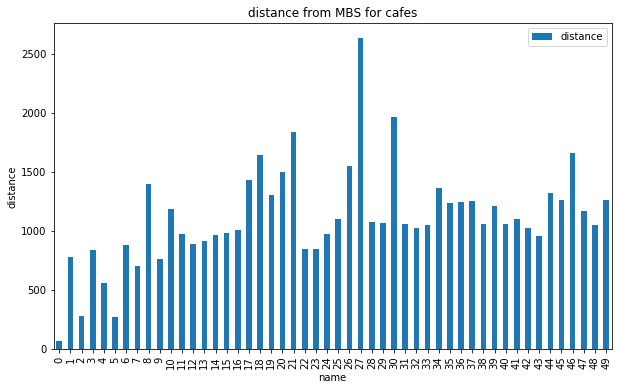

In [108]:
dist_venue.plot(kind='bar', figsize=(10, 6))
plt.xlabel('name')
plt.ylabel('distance')
plt.title('distance from MBS for cafes')
plt.show()